In [3]:
!pip install numpy pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 289.8 kB/s  0:00:05 eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_samples = 300

# Features
sleep_hours = np.clip(np.random.normal(7, 1.5, n_samples), 3, 10)
screen_time_before_bed = np.clip(np.random.normal(2, 0.8, n_samples), 0, 5)
caffeine_cups = np.clip(np.random.poisson(2, n_samples), 0, 6)
steps = np.clip(np.random.normal(8, 3, n_samples), 1, 20)  # in 1000s
stress_level = np.clip(np.random.normal(3, 1, n_samples), 1, 5)

# Construct a "true" energy_level with noise
# Intuition: more sleep & steps → higher energy; more screen & caffeine & stress → lower
noise = np.random.normal(0, 1, n_samples)

energy_level = (
    0.8 * sleep_hours          # positive
    - 0.6 * screen_time_before_bed
    - 0.4 * caffeine_cups
    + 0.3 * steps
    - 0.7 * stress_level
    + 5                        # base level
    + noise
)

# Clip to 1–10 range
energy_level = np.clip(energy_level, 1, 10)

data = pd.DataFrame({
    "sleep_hours": sleep_hours,
    "screen_time_before_bed": screen_time_before_bed,
    "caffeine_cups": caffeine_cups,
    "steps_1000": steps,
    "stress_level": stress_level,
    "energy_level": energy_level
})

data.head()


,sleep_hours,screen_time_before_bed,caffeine_cups,steps_1000,stress_level,energy_level
0,7.745071,1.336804,2,7.475121,2.354036,10.000000
1,6.792604,1.551855,3,5.732765,2.200808,8.851876
2,7.971533,2.597835,1,9.609530,2.517256,10.000000
3,9.284545,2.488296,3,5.304596,2.046671,10.000000
4,6.648770,1.983279,2,8.084543,3.122670,6.997666


In [6]:
data.shape, data.columns


((300, 6),
 Index(['sleep_hours', 'screen_time_before_bed', 'caffeine_cups', 'steps_1000',
        'stress_level', 'energy_level'],
       dtype='object'))

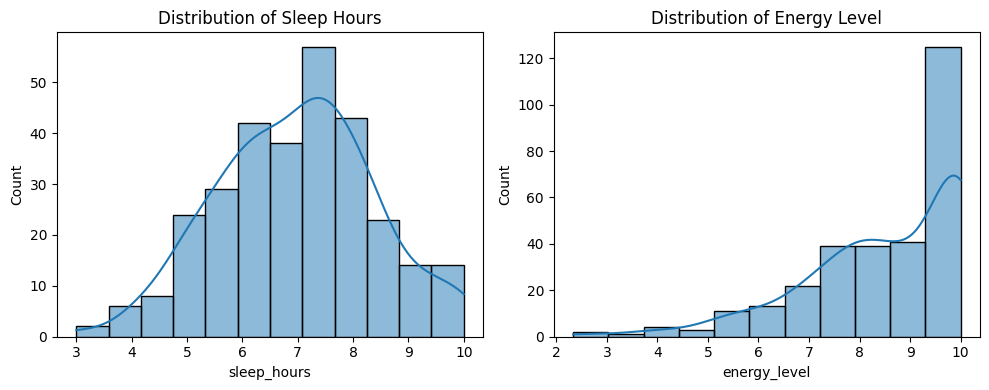

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data["sleep_hours"], kde=True)
plt.title("Distribution of Sleep Hours")

plt.subplot(1, 2, 2)
sns.histplot(data["energy_level"], kde=True)
plt.title("Distribution of Energy Level")

plt.tight_layout()
plt.show()


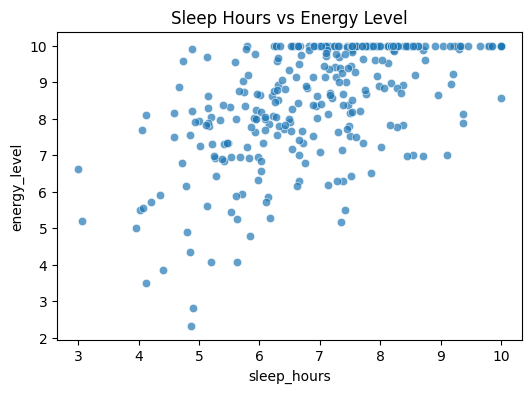

In [8]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="sleep_hours", y="energy_level", data=data, alpha=0.7)
plt.title("Sleep Hours vs Energy Level")
plt.show()


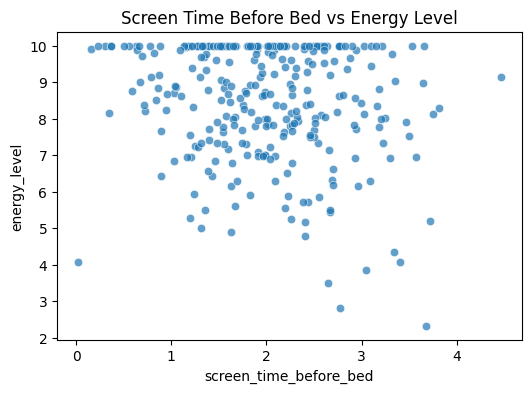

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="screen_time_before_bed", y="energy_level", data=data, alpha=0.7)
plt.title("Screen Time Before Bed vs Energy Level")
plt.show()


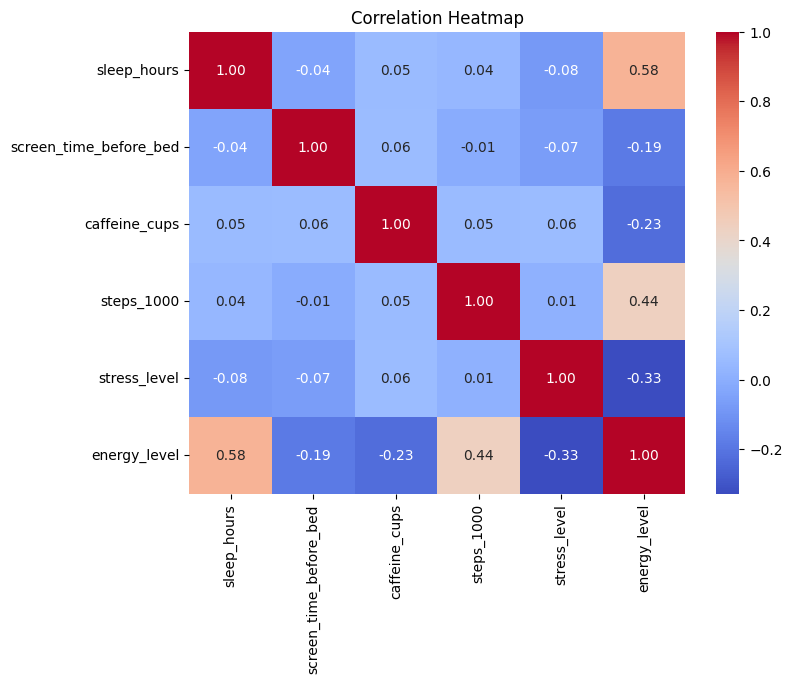

In [10]:
plt.figure(figsize=(8, 6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import train_test_split

X = data[["sleep_hours",
          "screen_time_before_bed",
          "caffeine_cups",
          "steps_1000",
          "stress_level"]]

y = data["energy_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((240, 5), (60, 5))

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_r2, test_r2


(0.6953543597906224, 0.6214182821579027)

In [16]:
# Show a few examples from the test set
X_test.head()


,sleep_hours,screen_time_before_bed,caffeine_cups,steps_1000,stress_level
203,8.580703,2.450375,2,6.640316,1.415864
266,9.448617,0.369500,0,3.312362,1.909034
152,5.979963,1.211419,3,9.696529,3.511203
9,7.813840,1.838246,2,10.453299,1.436809
233,6.022599,1.031187,1,3.215891,3.361504


In [17]:
# Compare true vs predicted energy for first 5 test rows
sample_X = X_test.head(5)
sample_y_true = y_test.head(5)
sample_y_pred = model.predict(sample_X)

results = pd.DataFrame({
    "sleep_hours": sample_X["sleep_hours"].values,
    "screen_time_before_bed": sample_X["screen_time_before_bed"].values,
    "caffeine_cups": sample_X["caffeine_cups"].values,
    "steps_1000": sample_X["steps_1000"].values,
    "stress_level": sample_X["stress_level"].values,
    "true_energy": sample_y_true.values,
    "predicted_energy": sample_y_pred
})

results


,sleep_hours,screen_time_before_bed,caffeine_cups,steps_1000,stress_level,true_energy,predicted_energy
0,8.580703,2.450375,2,6.640316,1.415864,10.000000,9.872815
1,9.448617,0.369500,0,3.312362,1.909034,10.000000,10.661405
2,5.979963,1.211419,3,9.696529,3.511203,6.962365,7.948722
3,7.813840,1.838246,2,10.453299,1.436809,10.000000,10.430460
4,6.022599,1.031187,1,3.215891,3.361504,6.837480,7.257504
